In [10]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np

from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

In [11]:
start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()
ticker = "FREY"
stock_data = pdr.get_data_yahoo(ticker)
close = stock_data.Close

In [12]:
log_return = np.log(stock_data.Close/stock_data.Close.shift(1).dropna())

In [13]:
daily_std = log_return.std()

In [14]:
annualized_volatility = daily_std * np.sqrt(252)
annualized_volatility = annualized_volatility * 100

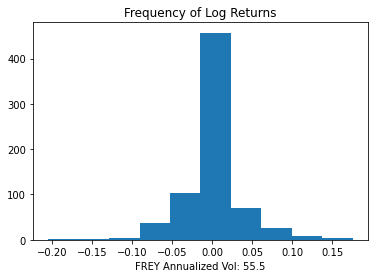

In [15]:
fig = plt.hist(log_return)
plt.title("Frequency of Log Returns")
plt.xlabel(ticker + " Annualized Vol: " + str(np.round(annualized_volatility, 1)))
plt.show()

<AxesSubplot:xlabel='Date'>

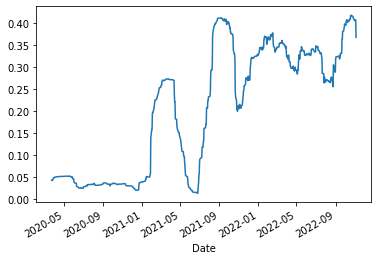

In [16]:
TRADING_DAYS = 50
volatility = log_return.rolling(window = TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
volatility.plot()

<AxesSubplot:xlabel='Date'>

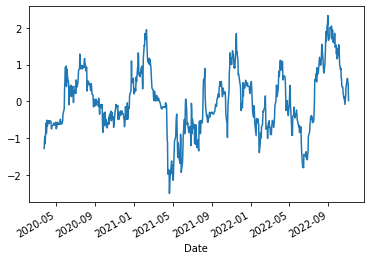

In [17]:
RISK_FREE_RATE = 0.04/252
rolling_sharpe = (log_return.rolling(window=TRADING_DAYS).mean() - RISK_FREE_RATE)*TRADING_DAYS/volatility
rolling_sharpe.plot()